# Linear Model Used Car Price Predictor 

Welcome to your first assignment! You will train a linear model to predict a used car's price based on its age.


Exercises:
1. $\color{violet}{\textbf{(10\%) Data Pre-Processing}}$
2. $\color{violet}{\textbf{(10\%) Create a Linear Model}}$
3. $\color{violet}{\textbf{(10\%) Calculate Mean Square Error Loss}}$
4. $\color{violet}{\textbf{(20\%) Compute Loss Gradient}}$
5. $\color{violet}{\textbf{(40\%) Implement Gradient Descent Algorithm}}$
6. $\color{violet}{\textbf{(10\%) Test Model with New Data}}$


**Instructions:**
- Write your code only between the $\color{green}{\textbf{\small \#\#\# START CODE HERE \#\#\#}}$ and $\color{green}{\textbf{\small \#\#\# END CODE HERE \#\#\#}}$ commented lines. $\color{red}{\textbf{Do not modify code out of the designated area.}}$
- Replace `None`s with appropriate variables or operations.
- Reference answers are provided after a certain coding blocks. Be aware if your answer is different from the reference..
- Avoid using for-loops and while-loops, unless you are explicitly told to do so.

**After this assignment you will:**

- Be able to train a neural network model with the simplest form: single-in, single-out linear function.
    - Initialize weight and bias parameters.
    - Use a loss function to evaluate the model's performance.
    - Optimize the weight and bias parameters using gradient descent algorithm.
- Get more used to vectorization using NumPy.

## 1 - Load the Data ##
Load the dataset: $\mathcal{D} = \{(^{(1)} x, ^{(1)} y), (^{(2)} x, ^{(2)} y), (^{(M)} x, ^{(M)} y)\}$, which contains $M$ samples (cars) with feature (mileage): $x$, and corresponding labels (price): $y$
The raw data is stored in numpy arrays. First, let's load these arrays. Then, plot a figure to intuitively illustrate the dataset.


dimension of raw features: 1, shape of raw features: (268577,)
dimension of raw labels: 1, shape of raw labels: (268577,)
fisrt 5 samples: (array([13.,  6.,  5.,  4.,  9.]), array([ 3500, 26000, 24971, 39990,  8495]))


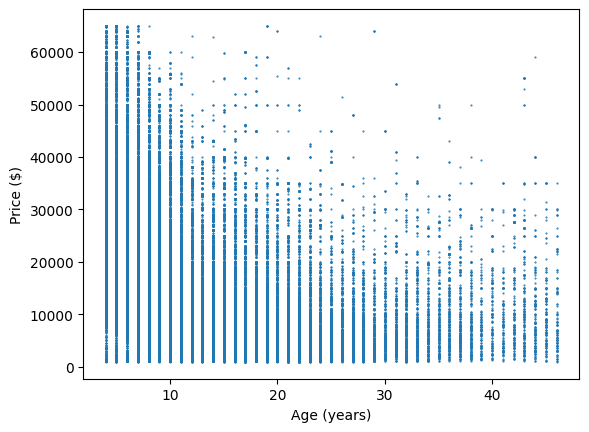

In [26]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Load the  raw data (year, price)
X_raw = np.load("ages_train.npy")
y_raw = np.load("prices_train.npy")
print(f"dimension of raw features: {X_raw.ndim}, shape of raw features: {X_raw.shape}")
print(f"dimension of raw labels: {y_raw.ndim}, shape of raw labels: {y_raw.shape}")
print(f"fisrt 5 samples: {X_raw[:5], y_raw[:5]}")

# Visualize the  raw data
plt.xlabel("Age (years)")
plt.ylabel("Price ($)")
plt.plot(X_raw, y_raw, '.', markersize=1)

As the raw data (feature and label) have different scales, we would like to rescale all the features (ages) and the labels (prices) to roughly between 0 and 10. 

In [25]:
X_rescale = X_raw / 10    # rescale to per decade
y_rescale = y_raw / 1e4  # rescale to per $10,000
print(f"fisrt 5 rescaled samples: {X_rescale[:5], y_rescale[:5]}")


fisrt 5 rescaled samples: (array([1.3, 0.6, 0.5, 0.4, 0.9]), array([0.35  , 2.6   , 2.4971, 3.999 , 0.8495]))


### $\color{violet}{\textbf{(10\%) Exercise 1: Data Pre-Processing}}$
It is prefered to reshape the raw feature and label arrays into 2-dimensional (2d) numpy arrays or column vectors. The 1st dimensions contains $M$ elements, and the 2nd dimension contains only 1 element.  


dimension of processed features: 2, shape of processed features: (268577, 1)
dimension of processed labels: 2, shape of processed labels: (268577, 1)
fisrt 5 processed samples: 
[[1.3]
 [0.6]
 [0.5]
 [0.4]
 [0.9]] 

[[0.35  ]
 [2.6   ]
 [2.4971]
 [3.999 ]
 [0.8495]]


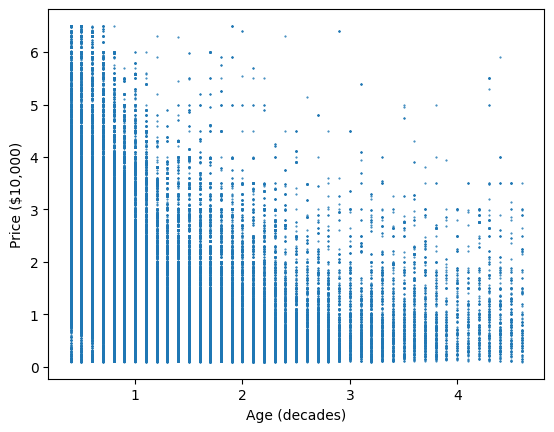

In [27]:
### START CODE HERE ### (≈ 2 line of code)
X_reshape = X_rescale.reshape(-1, 1)
y_reshape = y_rescale.reshape(-1, 1)
### END CODE HERE ###
print(f"dimension of processed features: {X_reshape.ndim}, shape of processed features: {X_reshape.shape}")
print(f"dimension of processed labels: {y_reshape.ndim}, shape of processed labels: {y_reshape.shape}")
print(f"fisrt 5 processed samples: \n{X_reshape[:5]} \n\n{y_reshape[:5]}")

# Visualize the processed data
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_reshape, y_reshape, '.', markersize=1)


**Expected Output**:
>
```console
dimension of processed features: 2, shape of processed features: (268577, 1)
dimension of processed labels: 2, shape of processed labels: (268577, 1)
fisrt 5 processed samples: 
[[1.3]
 [0.6]
 [0.5]
 [0.4]
 [0.9]] 

[[0.35  ]
 [2.6   ]
 [2.4971]
 [3.999 ]
 [0.8495]]
```

## 2 - Create a Linear Model
#### $\color{violet}{\textbf{(10\%) Exercise 2: Create a Linear Model}}$
Create a linear model: $\hat{\mathbf{y}} = w\mathbf{x} + b$ governed by the weight parameter, $w$ and bias parameter, $b$. The input feature (age) is $\mathbf{x}$, and the predicted output (price) is $\hat{\mathbf{y}}$.


In [28]:
def linear(input, weight, bias):
    """
    Linear model function
        Args:
            input: input features to linear model, (2d) numpy array
            weight: weight of linear model, scalar
            bias: bias of linear model, scalar
        Returns:
            output: predicted output from linear model, (2d) numpy array
    """
    ### START CODE HERE ### (≈ 1 line of code)
    output =  weight * input + bias
    ### END CODE HERE ###
    return output

# Sanity check
print(f"The model's output from 4 input values: \n{linear(np.linspace(-0.2, 0.2, 4).reshape(-1, 1), 2, -3)}")

The model's output from 4 input values: 
[[-3.4       ]
 [-3.13333333]
 [-2.86666667]
 [-2.6       ]]


**Expected Output**:
>
```console
The model's output from 4 input values: 
[[-3.4       ]
 [-3.13333333]
 [-2.86666667]
 [-2.6       ]]
```

## 3 - Evaluate the Model
We need a criterion to evaluate the performance of the model. Mean square error function: $\mathcal{L}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{M}\Sigma_{i=1}^M \frac{1}{2} (^{(i)}\hat{ y} - ^{(i)}y)^2$ is usually applied to calculate the averaged error between the model predictions and ground true labels.

#### $\color{violet}{\textbf{(10\%) Exercise 3: Calculate Mean Square Error Loss}}$
Please define a function to compute MSE loss between the predictions and the labeled ground truths.

Model's MSE loss: 15.530000000000001


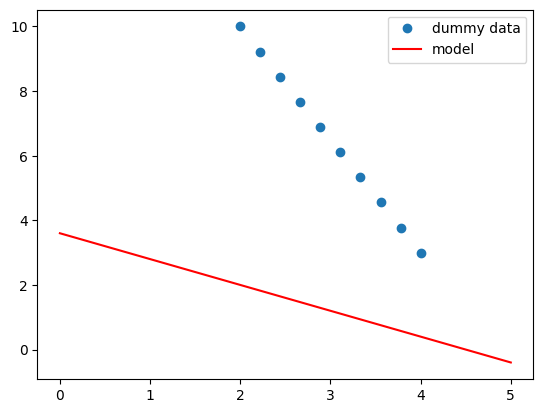

In [29]:
def mse_loss(pred, label):
    """
    Mean square error (MSE) function
        Args:
            pred: model predicted output, (2d) numpy array
            label: true label, (2d) numpy array
        Returns:
            loss_value: averaged MSE error, scalar
    """
    ### START CODE HERE ### (≈ 2 line of code)
    loss_value = np.mean(0.5 * (pred - label) ** 2)
    ### END CODE HERE ###
    return loss_value

# Sanity check
w = -0.8
b = 3.6
X_dummy = np.linspace(2, 4, 10).reshape(-1, 1)  # fake data for sanity check
y_dummy = np.linspace(10, 3, 10).reshape(-1, 1)
# Visualize the model
plt.plot(X_dummy, y_dummy, 'o')
plt.plot([0, 5], linear(np.array([0, 5]).reshape(-1, 1), w, b), 'r')
plt.legend(['dummy data', 'model'])
print(f"Model's MSE loss: {mse_loss(pred=linear(X_dummy, w, b), label=y_dummy)}")

**Expected Output**:
>
```console
Model's MSE loss: 15.530000000000001
```

## 4 - Gradient Descent Optimization
We need to calculate the gradient of the loss function $\mathcal{L}$ (derivatives with respect to $w$ and $b$). The purpose of doing so is to determine directions that increment $w$ and $b$ to reduce the MSE loss of the model. The gradient of the loss function can be computed as:

$\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{M} \Sigma_{i=1}^M (^{(i)}\hat{ y} - ^{(i)}y) ^{(i)}x$

$\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{M} \Sigma_{i=1}^M (^{(i)}\hat{ y} - ^{(i)}y)$



#### $\color{violet}{\textbf{(20\%) Exercise 4: Compute Loss Gradient}}$
Please define a function to compute gradient (derivatives) of the loss: $\frac{\partial \mathcal{L}}{\partial w}$ and $\frac{\partial \mathcal{L}}{\partial b}$


In [30]:
def grad(input, label, pred):
    """
    Compute gradient of loss function
        Args:
            input: input feature to linear model, (2d) numpy array
            label: true label, (2d) numpy array
            pred: model predicted output, (2d) numpy array
        Returns:
            dL_dw: dL/dw, scalar
            dL_db: dL/db, scalar
    """
    ### START CODE HERE ### (≈ 4 lines of code)
    dL_dw = np.mean((pred - label) * input)  # dL/dw
    dL_db = np.mean(pred - label)  # dL/db
    ### END CODE HERE ###

    return dL_dw, dL_db

# Sanity check
dw, db = grad(X_dummy, y_dummy, linear(X_dummy, w, b))
print(f"dL/dw = {dw}, dL/db = {db}")

dL/dw = -14.8, dL/db = -5.300000000000001


**Expected Output**:
>
```console
dL/dw = -14.8, dL/db = -5.300000000000001
```

#### $\color{violet}{\textbf{(40\%) Exercise 5: Implement Gradient Descent Algorithm}}$
To optimize $w$ and $b$, we need to perform gradient descent algorithm:

$\textbf{Initialize } w, b$

$\text{\textbf{Repeat} until converge } \{$

&nbsp; &nbsp; &nbsp; &nbsp; $\text{compute } \frac{\partial \mathcal{L}}{\partial w} \text{, and } \frac{\partial \mathcal{L}}{\partial b}$

&nbsp; &nbsp; &nbsp; &nbsp; $w := w - \alpha \frac{\partial \mathcal{L}}{\partial w}$

&nbsp; &nbsp; &nbsp; &nbsp; $b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}$

$\}$

where $\alpha$ is the learning rate (step size).

The goal is to bring the loss down **below 0.53**. 
> You may need to experiment this process a few times to find a good training profile. 


initial w = 3.684559810524488e-05, b = -0.0001387826445218712
loss @ 1 iteration: 2.1660192668556335
loss @ 2 iteration: 2.0203986923604877
loss @ 3 iteration: 1.8941100203105454
loss @ 4 iteration: 1.7844906357817536
loss @ 5 iteration: 1.689245603443134
loss @ 6 iteration: 1.606396885702373
loss @ 7 iteration: 1.5342395746445874
loss @ 8 iteration: 1.4713041690454869
loss @ 9 iteration: 1.4163240615359391
loss @ 10 iteration: 1.3682075163114038
loss @ 11 iteration: 1.3260135171690364
loss @ 12 iteration: 1.2889309513173675
loss @ 13 iteration: 1.256260668234186
loss @ 14 iteration: 1.2274000164817942
loss @ 15 iteration: 1.2018295162334975
loss @ 16 iteration: 1.1791013725349477
loss @ 17 iteration: 1.1588295750649802
loss @ 18 iteration: 1.1406813652746444
loss @ 19 iteration: 1.1243698820473143
loss @ 20 iteration: 1.1096478231070184
loss @ 21 iteration: 1.0963019818837052
loss @ 22 iteration: 1.0841485389206573
loss @ 23 iteration: 1.0730290036095744
loss @ 24 iteration: 1.0628067

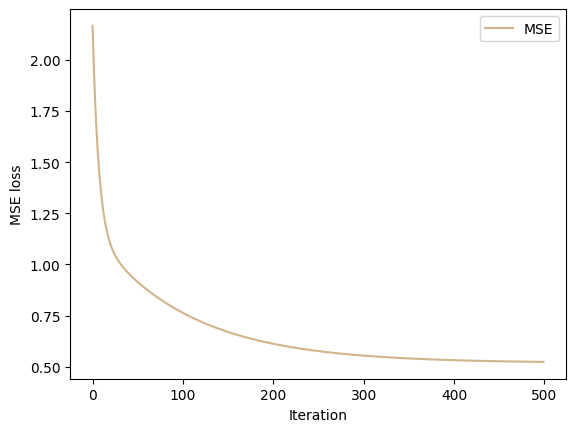

In [35]:
np.random.seed(3321)
# Initialize training data and linear model
X_train = X_reshape
y_train = y_reshape
w = np.random.normal(loc=0, scale=1e-4)
b = np.random.normal(loc=0, scale=1e-4)
print(f"initial w = {w}, b = {b}")

### START CODE HERE ### (≈ 7 lines of code)
num_iters = 500
alpha = 0.03  # learning rate
losses = []  # storage for loss at each iteration
for i in range(num_iters):
    preds = linear(X_train, w, b)  # linear model predictions
    dw, db = grad(X_train, y_train, preds)  # loss gradient w.r.t. weight, bias
    w = w - alpha * dw  # update weight
    b = b - alpha * db  # update bias
    loss = mse_loss(preds, y_train)
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")  # uncomment this line if need to debug
    losses.append(loss)
### END CODE HERE ###
print(f"final w = {w}, b = {b}")

# To visualize changing of the loss
plt.xlabel("Iteration")
plt.ylabel("MSE loss")
plt.plot(losses, 'tan')
plt.legend(['MSE'])


## 5 - Evaluate and Test the Model
Let's first evaluate the model using the training dataset.


On the training dataset, the model predicted price is different from the actual price: $7403.95655254607 in average


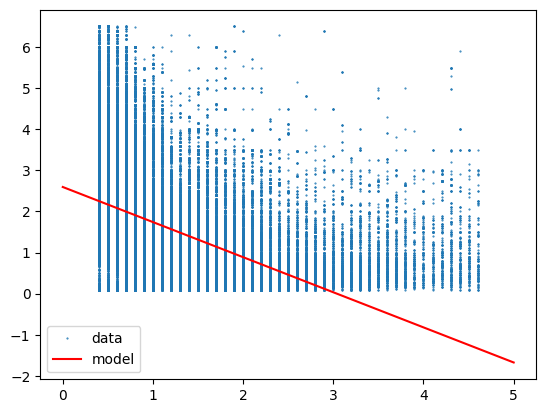

In [43]:
print(f"On the training dataset, the model predicted price is different from the actual price: ${mse_loss(pred=linear(X_train, w, b), label=y_train) * 2 ** 0.5 * 1e4} in average")
# Visualize the model
plt.plot(X_train, y_train, '.', markersize=1)
plt.plot([0, 5], linear(np.array([0, 5]).reshape(-1, 1), w, b), 'r')
plt.legend(['data', 'model'])


#### $\color{violet}{\textbf{(10\%) Exercise 6: Test Model with New Data}}$
Now, let's test the model with a new set of data.


dimension of test features: 2, shape of test features: (29842, 1)
dimension of test labels: 2, shape of test labels: (29842, 1)
On the test dataset, the model predicted price is different from the actual price: $7484.487377651854 in average


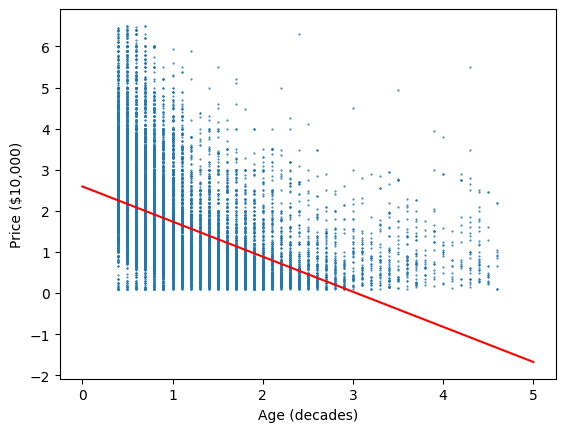

In [44]:
# Load test data
X_test = np.load("ages_test.npy").reshape(-1, 1) / 10  # rescale to per decade
y_test = np.load("prices_test.npy").reshape(-1, 1) / 1e4  # rescale to per $10,000
print(f"dimension of test features: {X_test.ndim}, shape of test features: {X_test.shape}")
print(f"dimension of test labels: {y_test.ndim}, shape of test labels: {y_test.shape}")

# You'll need to calculate mse loss of the model using the test data
### START CODE HERE ### (≈ 2 lines of code)
preds_test = linear(X_test, w, b)
loss_test = mse_loss(preds_test, y_test)
### END CODE HERE ###
print(f"On the test dataset, the model predicted price is different from the actual price: ${mse_loss(pred=linear(X_test, w, b), label=y_test) * 2 ** 0.5 * 1e4} in average")

# To visualize the model for how it fits to the test data
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_test, y_test, '.', markersize=1)
plt.plot([0, 5], linear(np.array([0, 5]), w, b), 'r')

> You may observe that the model did somehow catch the relationship between ages and prices of the cars. However, it does not make sense to predict negative price for the cars older than 3 decades. We'll investigate approaches to avoid this in the future.  

# Congratulations! You have finished this assignment!